In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Cargar Iris y filtrar solo dos clases (0: setosa, 1: versicolor)
iris = load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]


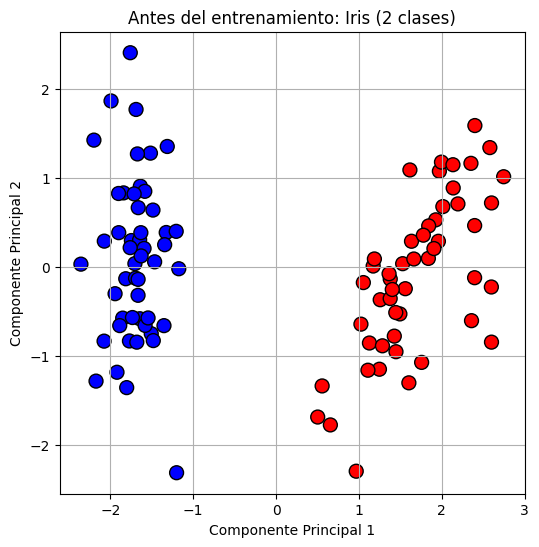

In [3]:
# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir a 2 dimensiones para graficar
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='bwr', s=100, edgecolors='k')
plt.title("Antes del entrenamiento: Iris (2 clases)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

Se muestran dos clases del dataset Iris proyectadas en 2D con PCA.

Los colores indican las clases originales:

🔵 Clase 0 (Setosa)

🔴 Clase 1 (Versicolor)
Usamos un perceptrón simple entrenado con solo dos clases del dataset Iris (Setosa y Versicolor).

El perceptrón aprende a clasificar los datos proyectados en dos dimensiones.

In [5]:
class SimplePerceptron:
    def __init__(self, lr=0.1, epochs=50):
        self.lr = lr
        self.epochs = epochs
        self.weights = None

    def fit(self, X, y):
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))  # Agrega bias (columna de 1s)
        self.weights = np.zeros(X_bias.shape[1])
        for _ in range(self.epochs):
            for xi, target in zip(X_bias, y):
                pred = self.predict_single(xi)
                self.weights += self.lr * (target - pred) * xi

    def predict_single(self, x):
        return 1 if np.dot(x, self.weights) >= 0 else 0

    def predict(self, X):
        X_bias = np.hstack((np.ones((X.shape[0], 1)), X))
        return np.array([self.predict_single(xi) for xi in X_bias])


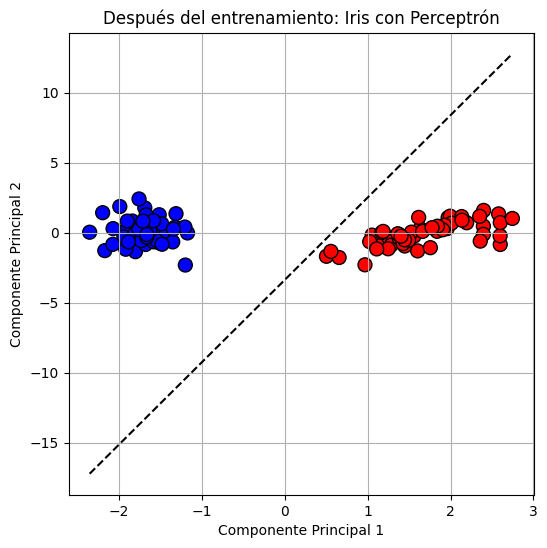

In [6]:
# Entrenar perceptrón
model = SimplePerceptron()
model.fit(X_2d, y)
y_pred = model.predict(X_2d)

plt.figure(figsize=(6, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_pred, cmap='bwr', s=100, edgecolors='k')
plt.title("Después del entrenamiento: Iris con Perceptrón")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Dibujar la línea de decisión
x_vals = np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 100)
w = model.weights
if w[2] != 0:
    y_vals = -(w[0] + w[1]*x_vals) / w[2]
    plt.plot(x_vals, y_vals, '--k')

plt.grid(True)
plt.show()


Los colores ahora representan la predicción del perceptrón.

La línea negra discontinua es el hiperplano de decisión aprendido.

Se puede ver que el perceptrón logra separar correctamente ambas clases (porque Setosa y Versicolor son linealmente separables).

Estas gráficas muestran cómo un perceptrón simple puede aprender a distinguir entre dos tipos de flores en el dataset Iris. Antes del entrenamiento, solo vemos los datos proyectados. Después, el perceptrón ha aprendido una línea de decisión que separa correctamente las dos clases. Esto demuestra su capacidad para resolver problemas linealmente separables en datos reales